In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, applications
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/PlantVillage_split/train',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 44361 files belonging to 39 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/PlantVillage_split/val',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 11087 files belonging to 39 classes.


In [4]:
from tensorflow.keras import applications, layers, Model, Input

In [5]:
base = applications.ResNet50(include_top=False, weights="imagenet", input_shape=(128, 128, 3))
base.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [6]:
inputs = Input(shape=(128, 128, 3))
x = base(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(39, activation="softmax")(x)

model = Model(inputs, outputs)

In [7]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 3066s 2s/step - accuracy: 0.7450 - loss: 0.9648 - val_accuracy: 0.9286 - val_loss: 0.2298
Epoch 2/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 68s 49ms/step - accuracy: 0.9247 - loss: 0.2321 - val_accuracy: 0.9414 - val_loss: 0.1860
Epoch 3/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 67s 49ms/step - accuracy: 0.9391 - loss: 0.1818 - val_accuracy: 0.9491 - val_loss: 0.1667
Epoch 4/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 68s 49ms/step - accuracy: 0.9482 - loss: 0.1553 - val_accuracy: 0.9438 - val_loss: 0.1906
Epoch 5/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 68s 49ms/step - accuracy: 0.9533 - loss: 0.1387 - val_accuracy: 0.9504 - val_loss: 0.1816
Epoch 6/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 68s 49ms/step - accuracy: 0.9539 - loss: 0.1334 - val_accuracy: 0.9522 - val_loss: 0.1698
Epoch 7/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 67s 49ms/step - accuracy: 0.9570 - loss: 0.1310 - val_accuracy: 0.9503 - val_loss: 0.1747
Epoch 8/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 68s 49ms/step - accuracy: 0.9572 -

# model eval

In [9]:
train_acc,train_loss= model.evaluate(training_set)

1387/1387 ━━━━━━━━━━━━━━━━━━━━ 58s 42ms/step - accuracy: 0.9855 - loss: 0.0431


In [11]:
val_acc,val_loss=model.evaluate(validation_set)

347/347 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9585 - loss: 0.1682


In [12]:
model.save("ResNet50.keras")

In [16]:
history.history

{'accuracy': [0.8515137434005737,
  0.9295101761817932,
  0.9419535398483276,
  0.9478145241737366,
  0.9528865218162537,
  0.9557945132255554,
  0.9571695923805237,
  0.9587475657463074,
  0.960641086101532,
  0.9630080461502075],
 'loss': [0.508203387260437,
  0.22005528211593628,
  0.17465682327747345,
  0.15685905516147614,
  0.13890106976032257,
  0.13126015663146973,
  0.12927190959453583,
  0.12150074541568756,
  0.11844102293252945,
  0.1126052662730217],
 'val_accuracy': [0.9285649657249451,
  0.9413727521896362,
  0.9491296410560608,
  0.9438080787658691,
  0.9503923654556274,
  0.9521962404251099,
  0.9503021836280823,
  0.9559844732284546,
  0.9545413255691528,
  0.9572471976280212],
 'val_loss': [0.2298467606306076,
  0.18603482842445374,
  0.16674524545669556,
  0.19057990610599518,
  0.18161413073539734,
  0.16978658735752106,
  0.17473696172237396,
  0.16365443170070648,
  0.16949564218521118,
  0.1631803810596466]}

In [17]:
import json
with open('rhistory.json', 'w') as f:
    json.dump(history.history, f)

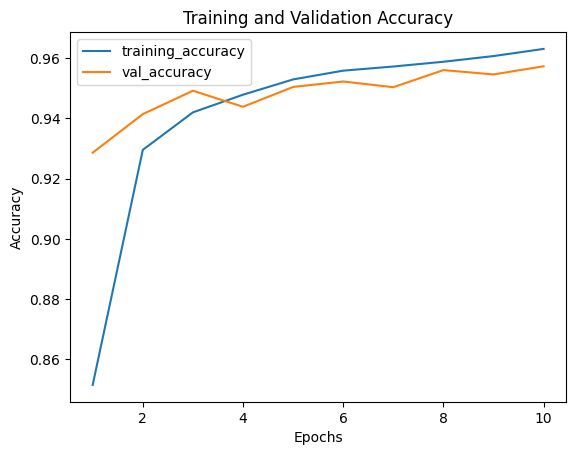

In [18]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,history.history['accuracy'],label='training_accuracy')
plt.plot(epochs,history.history['val_accuracy'],label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
class_names=validation_set.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Background_without_leaves',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot'